
Random Forest Metrics:
Accuracy: 0.7848
Precision: 0.7083
Recall: 0.6296
F1-score: 0.6667


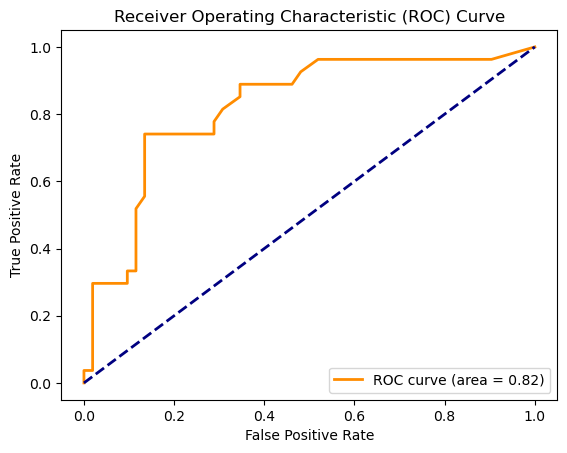


GBDT Metrics:
Accuracy: 0.7468
Precision: 0.6400
Recall: 0.5926
F1-score: 0.6154


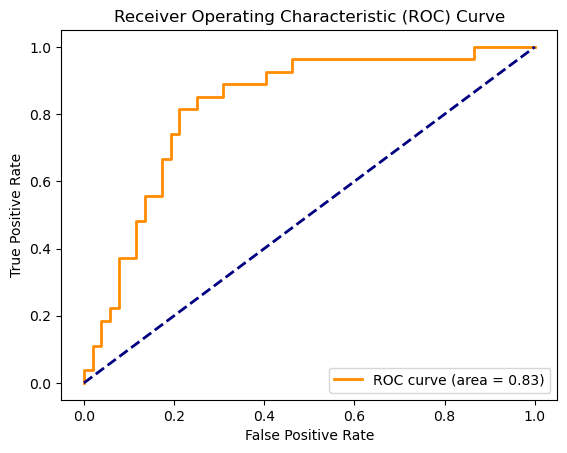


KNN Metrics:
Accuracy: 0.7089
Precision: 0.5769
Recall: 0.5556
F1-score: 0.5660


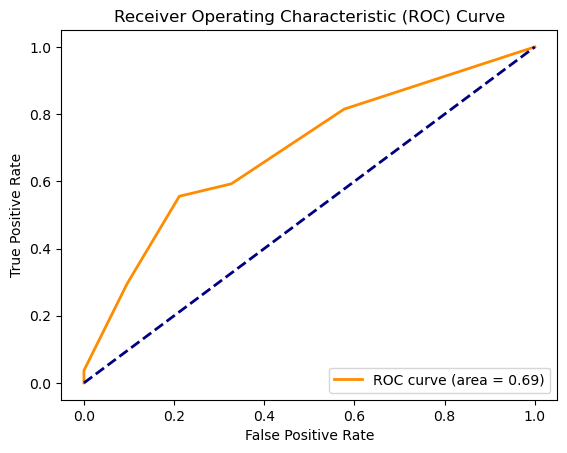


XGBoost Metrics:
Accuracy: 0.7468
Precision: 0.6400
Recall: 0.5926
F1-score: 0.6154


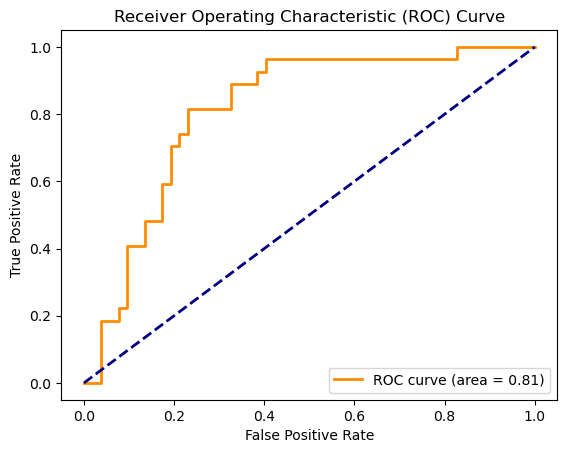

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
db = pd.read_csv("../data/diabetes.csv")

# Remove rows where any column except 'Pregnancies' or 'Outcome' is 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
db_filtered = db[(db[cols_to_check] != 0).all(axis=1)]

# Separate features and target variable
X = db_filtered.drop('Outcome', axis=1)
y = db_filtered['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute metrics and plot ROC curve
def compute_metrics_and_plot(model, X_test, y_test, name):
    print(f"\n{name} Metrics:")
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")   
    # Compute ROC curve and ROC area for each class
    y_scores = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
compute_metrics_and_plot(rf_model, X_test, y_test, "Random Forest")

# Train Gradient Boosting Decision Trees (GBDT)
gbdt_model = GradientBoostingClassifier(random_state=42)
gbdt_model.fit(X_train, y_train)
compute_metrics_and_plot(gbdt_model, X_test, y_test, "GBDT")

# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
compute_metrics_and_plot(knn_model, X_test, y_test, "KNN")

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
compute_metrics_and_plot(xgb_model, X_test, y_test, "XGBoost")


In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Compute metrics and plot ROC for the best model
compute_metrics_and_plot(best_rf_model, X_test, y_test, "Optimized Random Forest")
